In [1]:
# Install required libraries
!pip install ultralytics opencv-python --quiet


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


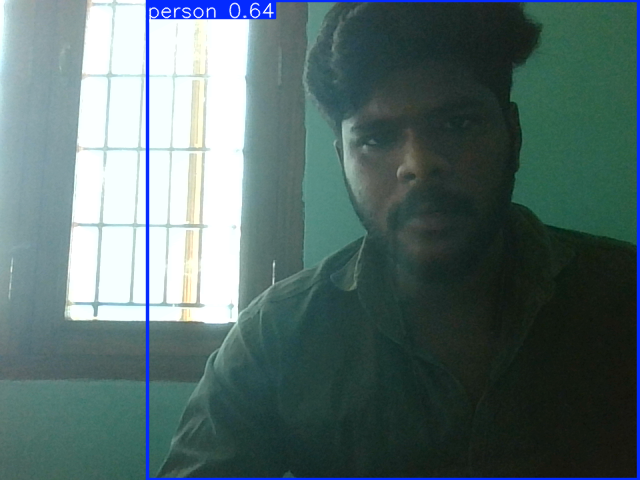

Stopped by user


In [4]:
import cv2
from ultralytics import YOLO
from IPython.display import display, clear_output
from PIL import Image
import numpy as np

# Load the pretrained model
model = YOLO("yolov8n.pt")

# Start webcam
cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)
        annotated_frame = results[0].plot()
        img_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        clear_output(wait=True)
        display(img_pil)
except KeyboardInterrupt:
    print("Stopped by user")

cap.release()
cv2.destroyAllWindows()

In [1]:
# Step 2: Import required libraries
import gradio as gr
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image

# Step 3: Load YOLOv8 pretrained model
model = YOLO("yolov8l.pt")  # Downloads automatically if not present

# Step 4: Define prediction function
def detect_objects(image):
    # Convert PIL image to OpenCV format
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    
    # Run YOLOv8 inference
    results = model(image_cv)
    
    # Draw results on the image
    annotated_img = results[0].plot()  # Draw detection boxes
    
    # Convert back to RGB PIL image
    output_image = Image.fromarray(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    return output_image

ModuleNotFoundError: No module named 'ultralytics'

In [7]:
# Step 5: Create Gradio UI
with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            input_image = gr.Image(label="Upload Image", type="pil")
            submit_btn = gr.Button("Submit")
        with gr.Column():
            output_image = gr.Image(label="Detection Output")
    
    submit_btn.click(fn=detect_objects, inputs=input_image, outputs=output_image)

# Step 6: Launch the app inside Jupyter
demo.launch(share=False, inline=True)  # share=True to generate public URL

* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.



0: 448x640 3 bananas, 2 apples, 2 oranges, 201.6ms
Speed: 6.9ms preprocess, 201.6ms inference, 5.2ms postprocess per image at shape (1, 3, 448, 640)

0: 640x608 1 orange, 5 carrots, 339.7ms
Speed: 7.7ms preprocess, 339.7ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 608)

0: 448x640 2 bottles, 1 cup, 1 spoon, 1 bowl, 1 dining table, 179.0ms
Speed: 5.9ms preprocess, 179.0ms inference, 7.1ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 laptop, 1 keyboard, 1 cell phone, 145.4ms
Speed: 7.6ms preprocess, 145.4ms inference, 6.9ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 1 person, 1 bicycle, 1 car, 2 chairs, 1 dining table, 1 laptop, 2 mouses, 2 remotes, 2 cell phones, 179.7ms
Speed: 49.8ms preprocess, 179.7ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)
